# Machine Learning


**_Author: Jessica Cervi_**

**Expected time = 2.5 hours**

**Total points = 80 points**

## Assignment Overview 

In this assignment, we will begin considering the second category of supervised learning problems from our machine learning lectures -- classification problems. Specifically, we will use `Scikit-Learn` to implement and evaluate classification models on the MNIST handwritten digit dataset. This is to serve as a reminder and expansion of some earlier work. Later, you will explore how to apply these machine learning ideas to graphs.

This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. **Remember to run your code from each cell before submitting your assignment.** Running your code beforehand will notify you of errors and give you a chance to fix your errors before submitting. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless you are specifically asked to. This will cause an error in Vocareum.
- Do not use a library unless you are expicitly asked to in the question. 
- You can download the Grading Report after submitting the assignment. This will include feedback and hints on incorrect questions. 


### Learning Objectives

- Understand the main concepts behind classification problems
- Understand the difference between training and testing sets
- Understand dummy variables and dummy classifiers
- Measure the perormance of a classifier using the accuracy score or the confusion matrix
- Use the implementation of Logistic Regression in `sklearn`
- Use the decision tree classifier in `sklearn`



## Index: 

####  Machine Learning

- [Question 1](#q01)
- [Question 2](#q02)
- [Question 3](#q03)
- [Question 4](#q04)
- [Question 5](#q05)
- [Question 6](#q06)
- [Question 7](#q07)
- [Question 8](#q08)
- [Question 9](#q09)
- [Question 10](#q10)
- [Question 11](#q11)
- [Question 12](#q12)
- [Question 13](#q13)
- [Question 14](#q14)



## Machine Learning

In this assignment, we will work with different dataset to understand and consolidate some of main concept behind an important class of machine learning algorithms: classification problems.

We will begin by splitting our data into a **training** and into a **testing** sets: the testing subset is for building your model. The testing subset is for using the model on unknown data to evaluate the performance of the model.
Next, we learn how to use a dummy classifier. A **dummy classifier** is a type of classifier which does not generate any insight about the data and classifies the given data using only simple rules. The classifier’s behavior is completely independent of the training data as the trends in the training data are completely ignored and instead uses one of the strategies to predict the class label.
It is used only as a simple baseline for the other classifiers i.e. any other classifier is expected to perform better on the given dataset. 
Next, we will learn how to measure the accuracy of a classiefier using two different metrics: the **accuracy score** and the **confusion matrix**.
Finally, we will guide you through the usage of an important classifier implemented in the `sk-learn` library: Logistic Regression.


As usual, we will begin by importing the librarries that we will be needing for this module

In [90]:
%matplotlib inline
# Our standard data imports
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#this is used to grade the assignment
import numpy.testing as npt
import pandas.testing as pdt

#hide warnings
import warnings
warnings.filterwarnings('ignore')

In this assignment, we will work with a dataset from the library `sklearn`. The digit dataset dataset is made up of 1,797 8x8 images. Each image is an hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

You can find more information about the dataset [here](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) or by running the code cell below.

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

# Extract data and targets as Numpy arrays
X, y = digits.data, digits.target
print('Input data shape: {}\tTarget data shape: {}'.format(X.shape, y.shape))

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

To get a better feel of what the input data is, let's extract a row of 64 numbers, reshape it into an $8\times8$ array, and examine the resulting matrix by printing the numeric values & by plotting it as an image. 

[[ 0.  0.  2. 12.  9.  0.  0.  0.]
 [ 0.  0. 11. 15. 12.  5.  0.  0.]
 [ 0.  0. 15.  5.  0. 14.  0.  0.]
 [ 0.  2. 15.  1.  0.  9.  7.  0.]
 [ 0.  4. 10.  0.  0.  7.  8.  0.]
 [ 0.  0. 12.  0.  0.  8. 10.  0.]
 [ 0.  2. 15.  5. 10. 16.  1.  0.]
 [ 0.  0.  5. 14. 12.  4.  0.  0.]]
y_130 = 0


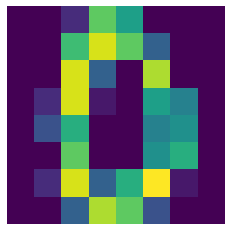

In [4]:
k = 130
im = X[k].reshape(8, 8)
print(im)
plt.imshow(im)
plt.axis('off')
print('y_{} = {}'.format(k, y[k]))

Apparently, row 130 of the matrix `X` (remember, indexed from zero, this is the 131st row from the top), when reshaped, yields the image above. The corresponding entry of the target vector `y` is $0$ which means that this image is intended to represent the numeral $0$. Whether this is obvious depends on the handwriting of the original author.

[Back to top](#Index:) 
<a id='q01'></a>


### Question 1:

*5 points*

Plot the image from row 100 of the matrix X. What numeral does this image represent?
Assign your response as an integer to the identifier `ans_1`.

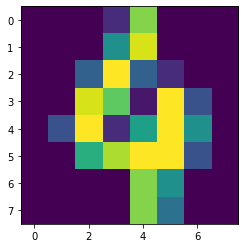

This is an image of the digit 4.


In [5]:
### GRADED


k = 100
y = digits.target
### YOUR SOLUTION HERE
ans_1 = 4
#print(y[100])
###
### YOUR CODE HERE
###
image_digit = X[k].reshape(8, 8)
plt.imshow(image_digit)
plt.show()
print('This is an image of the digit {}.'.format(ans_1))

In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Target Variables

In classification problems, the labels (or targets) are *discrete* or *categorical* values (by contrast with regression problems). That being the case, we generally prefer the labeled data to be *balanced*; that is, we prefer having a uniform distribution of labels from which to build our models. For a binary classification problem (i.e., one with two classes), that would mean 50% of the data is from one class and 50% of the data from the other class. For a classification problem with $k$ classes, that would mean each class is represented in $(100 \div k)$% of the data.

Examining the target vector `y` for the MNIST digits data, it appears that each numeral from the sequence `0` through `9` occurs in a random sequence:

In [7]:
y = digits.target
print(y[31:60])

[9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3]


[Back to top](#Index:) 
<a id='q02'></a>


### Question 2:

*5 points*

Your task here is to summarize how often each digit from `0` through `9` occurs in the vector `y`. The result be a Pandas Series with the integers `0` though `9` as the index (sorted in increasing order) and the corresponding counts as the data. Assign the result to the identifier `digit_counts`.

(Hint: the Pandas Series method `value_counts` can do this easily, as can the Numpy function `unique`).

In [8]:
### GRADED

### YOUR SOLUTION HERE
digit_counts = pd.value_counts(y, sort=False)
###
### YOUR CODE HERE
###
print(digit_counts)

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
dtype: int64


In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Train/Test Split

From question 2, it seems the MNIST digits data set is fairly balanced. Each of the 10 possible digits occurs roughly 180 times. As with regression problems, we want to divide the data into training and testing sets. The easiest way to do so is using the function `train_test_split` from the Scikit-Learn submodule `sklearn.model_selection` (you can consult the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to learn how to customize the behavior of this function).

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

[Back to top](#Index:) 
<a id='q03'></a>


### Question 3:

*5 points*

Your task here is to create a Pandas DataFrame with the digits from $0$ through $9$ in ascending order as the index and with two columns: `train_counts` and `test_counts`. The entries of each row, then, are the number of occurrences of that digit in the training target `y_train` and the testing target `y_test` respectively. Bind the DataFrame to the identifier `split_digit_counts`.

That is, your final DataFrame should have these headings:
               | train_counts | test_counts | 
       =======================================
       |Digits |                |

In [11]:
### GRADED

### YOUR SOLUTION HERE
bro = {'train_counts': pd.value_counts(y_train, sort=False),
        'test_counts': pd.value_counts(y_test, sort=False)
        }
split_digit_counts = pd.DataFrame(bro)
###
### YOUR CODE HERE
###
split_digit_counts

,train_counts,test_counts
0,135,43
1,145,37
2,139,38
3,137,46
4,126,55
5,123,59
6,136,45
7,138,41
8,136,38
9,132,48


In [12]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Binary classification

To begin, we will turn this into a binary classification problem.  We'll focus specifically on identifying all the occurrences of the digit `9`. For this simpler binary classification problem, we need to change every value in the vector `y` to `1` or `0` according to whether it is `9` or not. That is, replace every occurrence of `9` in the vector  `y` with the value `1` and replace all the other values with `0`. This process is called *binarization*.

[Back to top](#Index:) 
<a id='q04'></a>


### Question 4:

*5 points*

Your task here is to create three new arrays: `y_bin`, `y_bin_train`, and `y_bin_test`. These will be binary vectors with `1`s replacing `9`s in `y`, `y_train`, and `y_test` respectively. All other entries will be replaced by `0`s.

(Hint: The Numpy function `where` is very useful in this context).

In [13]:
### GRADED

### YOUR SOLUTION HERE
y_bin = np.where(y < 9, 0,(np.where(y == 9, 1,y)))
y_bin_train = np.where(y_train < 9, 0,(np.where(y_train == 9, 1,y_train)))
y_bin_test = np.where(y_test < 9, 0,(np.where(y_test == 9, 1,y_test)))


###
### YOUR CODE HERE
###


In [14]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### DummyClassifier

To begin, we'll apply the built-in [`DummyClassifier` class from `sklearn.dummy`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) to set a baseline for performance of our future models.  This classifier does not actually use the feature matrix `X`. Classification decisions are made using the target vector `y` only. There are a few permissible strategies, but we'll start with the `'most_frequent'` strategy. That is, the `predict` method always returns the majority class. For our binary digit classification problem, this would be `0` (because the `1` classification is reserved for `9`s and most of the digits are not `9`s).

In [15]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_bin_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

Having applied the `fit` method to the training data, we can use the `predict` method to see how this estimator classifies the data. Unsurprisingly, it returns a vector of all `0`s (because that is the majority class for this data).

In [16]:
y_bin_pred = dummy.predict(X_test)
print(y_bin_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


We can compute the fraction of correct classifications using the method `score` with the test data:

In [17]:
score = dummy.score(X_test, y_bin_test)
print('The fraction of correct classifications is: {}'.format(score))

The fraction of correct classifications is: 0.8933333333333333


Using `dummy.score` is equivalent to explicitly comparing the entries of `y_bin_pred` to `y_bin_test`, counting the number of correct classifications, and dividing by the number of classifications in total. 

In [18]:
# This is the long way of computing the accuracy score
correct_classifications = (y_bin_pred == y_bin_test)
score = correct_classifications.sum() / len(correct_classifications)
print('The fraction of correct classifications is: {}'.format(score))

The fraction of correct classifications is: 0.8933333333333333


For classification problems, a *confusion matrix* is a more detailed description of the accuracy of a classifier. It contains entries for the actual values as rows and predicted values as columns. This means we have:

| $~$ | predicted 0 | predicted 1 |
| ---- | ----------- | ---------- |
| **actual 0** |  true negative | false positive |
| **actual 1** |  false negative | true positive |



In *Scikit-Learn*, the `confusion_matrix` function takes as arguments the actual labels followed by the predicted labels (labeled in ascending order according to the class labels). From the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

> `sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)`
>
> Compute a confusion matrix to evaluate the accuracy of a classification
>
> By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.
>
> Thus in a binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$, and false positives is $C_{0,1}$.

[Back to top](#Index:) 
<a id='q05'></a>


### Question 5:

*10 points*

Generate the confusion matrix associated with the test data for this digits binary classification problem (i.e., computing which images correspond to the digit `9` and which do not). 

Use the training data (X_train, y_bin_train) to fit a `DummyClassifier` class instance to the training data as we did above. Then, construct a prediction from the test  input features X_test and, by comparing to the test labels y_bin_test, build the corresponding confusion matrix. Assign the resulting 2D Numpy array to the identifier `bin_confusion_mat`.

You can do so explicitly or you can use the function `confusion_matrix` from `sklearn.metrics` according to your preference.

In [36]:
### GRADED

from sklearn.metrics import confusion_matrix

### YOUR SOLUTION HERE
dummy.fit(X_train, y_bin_train)
pred = dummy.predict(X_test)
bin_confusion_mat = confusion_matrix(y_bin_test,pred, labels=None, sample_weight=None)
###
### YOUR CODE HERE
###
#bin_confusion_mat

In [37]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Accuracy

The most basic way to assess our performance is to compare how many predictions we were right on out of the total number of observations.  We refer to this as **accuracy**. Using the diagram of our confusion matrix above, we have the formula

$$\text{accuracy} = \frac{\text{tp} + \text{tn}}{\text{tn} + \text{tp} + \text{fn} + \text{fp}}$$

where $\text{tp}$ is the number of true positives, $\text{tn}$ is the number of true negatives, $\text{fp}$ is the number of false positives, and $\text{fn}$ is the number of false negatives.

[Back to top](#Index:) 
<a id='q06'></a>


### Question 6:

*5 points*

Your task here is to compose a function `accuracy_score` that implements the preceding formula. The input to the function is a (previously computed) confusion matrix and the output is an accuracy score.

In [21]:
### GRADED


### YOUR SOLUTION HERE
def accuracy_score(confusion_matrix):
    '''
    This function takes in a confusion matrix 
    (from a binary classification problem)
    and returns the accuracy score.
    '''
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
###
### YOUR CODE HERE
###
# accuracy_score(bin_confusion_mat)

In [22]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Logistic Regression

We move on now to estimators for classification problems that actually use the input data (unlike the `DummyClassifier`).  To begin, let's examine the [`LogisticRegression` estimator](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression). In order to determine a logistic regression model, a nonlinear system of equations needs to be solved iteratively. Thus, when we instantiate the estimator, we can specify the solver and the maximum number of iterations. For instance:

```python
>>> from sklearn.linear_model import LogisticRegression
>>> clf = LogisticRegression(solver='newton-cg', max_iter=1000)
```
Don't worry about what these particular optional parameters mean. Although other choices exist, we'll use these for now.

As with other *Scikit-Learn*'s estimator classes, the `.fit` and `.predict` methods are used to construct the model and make predictions.

In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'newton-cg', max_iter=1000)
clf.fit(X_train, y_bin_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = clf.predict(X_test)
y_pred[335:350] # Some zeros, some ones

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

For classifications, we can also access the *probabilities* of correctness. That is, for a given observation (i.e., row of `X`), there is not only the class prediction (i.e., corresponding row of `y`), but there are associated *probabilities of that observation belonging to each class*. These probabilites are accessible by the method `predict_proba`. For each observation, this returns a row vector of nonnegative values that sum to 1 where the entry in column $k$ is the probability of belonging to class $k$. Thus, for this binary classification problem, after fitting a classifier (e.g., `LogisticRegression`) to the training data, the method `predict_proba` returns an $n_{\text{test}}\times2$ matrix of probabilities (where $n_{\text{test}}$ is the number of observations in the testing set) whose rows all sum to one.

In [40]:
# Column 0: probability of class 0
# Column 1: probability of class 1
clf.predict_proba(X_test)[335:350]

array([[9.99999959e-01, 4.11013670e-08],
       [9.99999993e-01, 7.12261056e-09],
       [2.96714441e-05, 9.99970329e-01],
       [9.99360921e-01, 6.39079380e-04],
       [1.00000000e+00, 2.37463349e-13],
       [9.99999999e-01, 8.59748534e-10],
       [1.00000000e+00, 8.11193166e-20],
       [1.00000000e+00, 1.32088362e-18],
       [1.00000000e+00, 1.04422574e-13],
       [9.99833323e-01, 1.66676925e-04],
       [6.20574701e-06, 9.99993794e-01],
       [9.99999998e-01, 1.90976911e-09],
       [8.90567392e-06, 9.99991094e-01],
       [9.99999910e-01, 9.00940355e-08],
       [1.00000000e+00, 7.59870641e-11]])

Here we have constructed a function `prob_table` encapsulating the previous computations. This function accepts the test data `X_test`, and `y_test`, followed by a classifier (e.g., `DummyClassifier`, `LogisticRegression`, etc.) as arguments. The classifier should already have been fit to data (e.g., `classifier.fit(X_train, y_train)` should already have been invoked). The result returned should be a DataFrame:



|  $~$ | prob_0 | prob_1 | predicted_value | actual_value |
| ---- | ----------- | ----------- | ------------------ | ------------ |
| **0** |  $p_0$ | ($1-{}$ $p_0$) | $y^{\text{pred}}_0$ | $y^{\text{test}}_{0}$ |
| **1** |  $p_1$ | ($1-{}$ $p_1$) | $y^{\text{pred}}_1$ | $y^{\text{test}}_{1}$ |
| $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ |



In [41]:
def prob_table(X_test, y_test, classifier):
    '''
    This function takes in a test set X_test, y_test,
    and a classifier (that has been fit to data)
    It returns a DataFrame with columns below:
    | probab_0 | probab_1 | predicted_value | actual_value |
    ========================================================
    '''
    y_pred = classifier.predict(X_test)
    probabilities = classifier.predict_proba(X_test)
    df = pd.DataFrame()
    for k in range(probabilities.shape[1]):
        df['probab_{}'.format(k)] = probabilities[:,k]
    df['predicted_value'] = y_pred
    df['actual_value'] = y_test
    return df


## Standardizing the data

Prior to fitting a given estimator to data, we usually want to *standardize* the data. This is usually done by replacing features with their respective *z-scores*. That is, we translate and rescale the data so that the $k$th feature $x_k$ is replaced according to the substitution $x_k \leftarrow (x_k - \mu_k) / \sigma_k$ where $\mu_k$ is the (empirical) mean of the $k$th feature and $\sigma_k$ is the (empirical) standard deviation of the $k$th feature. When working with testing and training data sets, the values of $\mu_k$ and $\sigma_k$ are determined using the training data and those same values are used to standardize the test data when validating the resulting estimator.

All of the above can be achieved using the [`StandardScaler` class from `sklearn.preprocessing`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instances of this class can accept a matrix of observations and return the corresponding z-scores down each column (remember, the rows are observations and the columns are the features). The resulting `StandardScalar` object, once fit to the training data, can be used to transform the testing data as well.

Here's an example of how to use the `StandardScaler` class to transform data:
```python
>>> from sklearn.preprocessing import StandardScaler
>>> data = np.array([[0, 0], [0, 1], [1, 1], [1, 1]]) # Create 4x2 array of data
>>> scaler = StandardScaler() # Instantiate StandardScaler object
>>> scaler.fit(data)          # Use columns from data to define transformation
>>> print(scaler.mean_)       # means of 2 columns from data
[0.5  0.75]
>>> print(scaler.var_)        # variances of 2 columns from data
>>> print(scaler.transform(data))  # Applying transformation to data
[[-1.         -1.73205081]
 [-1.          0.57735027]
 [ 1.          0.57735027]
 [ 1.          0.57735027]]
>>> print(scaler.transform([[2, 2]]))  # Applying transformation to new observation
[[3.         2.88675135]]
```
As an alternative to applying the methods `fit` and then `transform`, there is a `fit_transform` method that combines the two into a single step.

[Back to top](#Index:) 
<a id='q07'></a>


### Question 7:

*10 points*

Your task here is to standardize the data using the `StandardScalar` class as above. You'll define the transformation to the training feature matrix `X_train` with the `fit` method. You'll apply the resulting transformation to `X_train` and `X_test` to yield standardized data for both the training and testing sets. From there, you'll define a `LogisticRegression` classifier and fit that to the standardized training feature matrix and the binary labels `y_bin_train`. Set the arguments `max_iter` equal to 1000 and `solver` equal to `newton-cg` inside the `LogisticRegression` classifier.

Finally, you'll use the function `prob_table` from above to create a DataFrame `prob_table_standardized` that shows the classifications using the standardized test data as compared to the actual classifications with their corresponding probabilities.

In [42]:
### GRADED
from sklearn.preprocessing import StandardScaler

### YOUR SOLUTION HERE
scaler = StandardScaler() # Instantiate StandardScaler object
scaler.fit(X_train)
scaler.mean_
scaler.var_               # Use columns from data to define transformation
scaler.transform(X_train)
scaler.transform(X_test)
classifier = LogisticRegression(solver = 'newton-cg', max_iter=1000)
classifier.fit(X_train, y_bin_train)
prob_table_standardized = prob_table(X_test, y_test, classifier)
###
### YOUR CODE HERE
###

# prob_table_standardized


,probab_0,probab_1,predicted_value,actual_value
0,1.000000,3.245542e-09,0,6
1,0.000027,9.999734e-01,1,9
2,0.999997,2.593555e-06,0,3
3,0.989060,1.094016e-02,0,7
4,1.000000,5.865655e-13,0,2
...,...,...,...,...
445,1.000000,3.273137e-09,0,3
446,1.000000,1.641273e-21,0,6
447,1.000000,4.354151e-16,0,2
448,1.000000,2.015757e-17,0,6


In [27]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Using Pipelines

Many modeling tasks involve the combination of preprocessing steps that are fed into an estimator.  As such, *Scikit-Learn* comes with a handy `Pipeline` module that allows us to combine *transformers* (e.g., `StandardScaler`) and *estimators* (e.g., `LinearRegression`, `LogisticRegression`, etc.) in a single object.  The `Pipeline` expects a sequence of transformers -- objects that have methods `fit`, `transform`, & `fit_transform` -- and ends with an estimator -- objects that have methods `fit`, `predict`, & `fit_predict`.  For example, we could have a `Pipeline` that scales our data and subsequently fits a `LogisticRegression` model as follows:

```python
pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000, solver='newton-cg'))])
```

Notice that the `Pipeline` object is instantiated using a list of tuples. All the tuples consist of a string identifier followed by an instance of one of Scikit-Learn's transformer classes except the last tuple (which has an estimator class instance instead). The resulting `Pipeline` object behaves like an estimator (i.e., it has methods `fit`, `predict`, and `fit_predict`).

[Back to top](#Index:) 
<a id='q08'></a>


### Question 8:

*5 points*

Your task here is to construct a `Pipeline` object as described above for a binary classification problem. We'll load and prepare the data `X` and `y` for you (`y` is a binary vector distinguishing the digit `3` from all other digits).

Construct a pipeline object called pipe combining a StandardScaler transformation with a LogisticRegression estimator. Fit the resulting pipelined estimator's to the training data `X_train` and `y_train` (provided) and construct a vector `y_pred` using the predict method of the Pipeline.

Be sure your solution binds a suitable Pipeline object to the identifier `pipe` and a `Numpy` array to the identifier `y_pred`.

In [43]:
### GRADED

from sklearn.pipeline import Pipeline
digits = load_digits()
X, y = digits.data, np.where(digits.target==3, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
### YOUR SOLUTION HERE
pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000, solver='newton-cg'))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
###
### YOUR CODE HERE
###


In [29]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Regularization

As with linear regression, we can use *regularization* in conjunction with logistic regression. That is, we can modify the objective function being minimized to construct the estimator with a penalty term. From the [Scikit-Learn User guide](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression):

> As an optimization problem, binary class $L2$ penalized logistic regression minimizes the following cost function:
>    $$\min_{w,c} \frac{1}{2}w^Tw + C\sum_{i=1}^{n}\log\left(\exp\left(-y_i\left(X_{i}^{T}w+c\right)\right)+1\right).$$
> Similarly, $L1$ regularized logistic regression solves the following optimization problem
>    $$\min_{w,c} \left\|w\right\|_{1} + C\sum_{i=1}^{n}\log\left(\exp\left(-y_i\left(X_{i}^{T}w+c\right)\right)+1\right).$$
> Note that, in this notation, it's assumed that the observation $y_i$ takes values in the set $\{-1,1\}$ at trial.

Ignoring the mathematical details of all the terms in these objective functions, the regularization parameter in the Scikit-Learn `LogisticRegression` estimator is labeled `C` consistent with the parameter $C$ in the equations above. Loosely speaking, $C$ controls the relative importance of the penalty term (the terms $w^Tw$ or $\|w\|_1$ in each of the objective functions) and the unpenalized objective (the expression preceded by $C$). So, when $C$ is small, the coefficients in $w$ that determine the logistic regressor are penalized more strongly forcing the penalty term to be smaller.

In practice with *Scikit-Learn*, we instantiate a `LogisticRegression` instance using the keyword option `C`. For our purposes, this means (when we use the `max_iter` and `solver` parameters as before) the following code for instantiation:

```python
>>> clf = LogisticRegression(C=100, max_iter=1000, solver='newton-cg')
```

Below, we have defined a function ,  `log_reg_gridsearch`, that accepts as input arguments the input feature matrix `X`, the target vector `y`, and a list `C_vals` of positive scalar values (for the regularization parameter $C$ in regularized logistic regression).

The input data is split into training & test sets with a fixed random parameter 42.

This function loops over the values `c_val` within the list `C_vals`. For each value, it:
  - instantiate a `Pipeline` object with a `StandardScaler` object followed by a `LogisticRegression` object
  
  - instantiate the `LogisticRegression` estimator with keyword arguments `solver='newton-cg'`, `max_iter=1000`, and `C=c_val`.
  
- fit the `Pipeline`  to the training data `X_train` & `y_train`

- uses the `Pipeline` to predict target values from the test data `X_test`

The result returned by the function is a DataFrame with two columns: `'C'` and `'accuracy'`. The column `'C'` contains the elements of the input list `C_vals`. The column `'accuracy'` contains the corresponding accuracy score as computed in the loop just described.

In [44]:
def log_reg_gridsearch(X, y, C_vals):
    '''
    Input: predictor X values, target y values, and a list of
    values for C in the LogisticRegression estimator.
    
    Output: DataFrame with accuracy scores & C values
    '''
    # DO NOT CHANGE THE LINE BELOW
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    results = []
    for c_val in C_vals:
        kwargs = {'solver':'newton-cg', 'max_iter':1000, 'C':c_val}
        pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(**kwargs))])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        results.append(accuracy_score_T(confusion_matrix(y_test, y_pred)))
    df = pd.DataFrame({'C':C_vals, 'accuracy': results})
    return df


## Decision Trees

Now, we turn to a different classifier -- the `DecisionTreeClassifier`.  The aim is to compare its performance to that of our `LogisticRegression` classifier. As with `LogisticRegression` and other estimators, the specific performance and behavior of the `DecisionTreeClassifier` can be tuned by specifying certain *hyperparameters* upon instantiation. Some useful hyperparameters for the `DecisionTreeClassifier` are:

* `criterion`: `'gini'` (default) for the Gini impurity or `'entropy'` for the information gain
* `max_depth`: depth of tree (default `None`; expands until all nodes are pure)
* `min_samples_split`: minimum number of samples required to split a node (default 2)

We also would like to search over different hyperparameters relevant to this classifier as well.  In the problem below, you are asked to fit a `DecisionTreeClassifier` and search over the three hyperparameters listed above.

Here, we build a function `decision_tree_gridsearch` similar to `log_reg_gridsearch`. The function `decision_tree_gridsearch` accepts as input arguments the input feature matrix `X`, the target vector `y`, a list `criteria` of strings (either `'gini'` or `'entropy'` or both), a list `depths` of positive integers, and a list `min_splits` of positive integers.

The input data is split into training & test sets with a fixed random parameter 42.

This function will loop over all the hyperparameter values within the three input lists. For each hyperparameter combination, it:
   - Instantiate a `DecisionTreeClassifier` object
   
   - Instantiate the `DecisionTreeClassifier` estimator with hyperparameters `criterion`, `max_depth`, and`min_samples_split` determined from the input
   
   - Fit the `DecisionTreeClassifier` to the training data `X_train` & `y_train`
   
   - Uses the `DecisionTreeClassifier`  to predict target values from the test data `X_test`


The result returned by the function is a DataFrame with four columns: `'criterion'`, `'max_depth'`, `'min_samples_split'`, and `'accuracy'` . The first three columns contain all combinations of the hyperparameter values from the input lists. The column `'accuracy'` contains the corresponding accuracy score as computed in the loop just described.

In [45]:

def decision_tree_gridsearch(X, y, criteria, max_depths, min_splits):
    '''
    Input: predictor X values, target y values, and lists criteria,
           max_depths, & min_splits of hyperparameter values for
           the DecisionTreeClassifier.
    
    Output: DataFrame with accuracy scores & hyperparameter values;
            column headings as follows:
            | 'criterion' | 'max_depth' | 'min_samples_split' | 'accuracy' |
            ----------------------------------------------------------------
    '''
    # DO NOT CHANGE NEXT LINE
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, random_state=42)
    results = []
    crit = []
    mdepth = []
    minspl = []
    for criterion in criteria:
        for max_depth in max_depths:
            for min_samples_split in min_splits:
                kwargs = {'criterion':criterion,
                          'max_depth':max_depth,
                          'min_samples_split':min_samples_split}
                clf_ = DecisionTreeClassifier(**kwargs)
                clf_.fit(X_train_, y_train_)
                results.append(clf_.score(X_test_, y_test_))
                crit.append(criterion)
                mdepth.append(max_depth)
                minspl.append(min_samples_split)
    df = pd.DataFrame({'criterion':crit, 'max_depth':mdepth,
                       'min_samples_split':minspl, 'accuracy': results})
    df = df.sort_values(by=['criterion', 'max_depth', 'min_samples_split']).reset_index(drop=True)
    return df


## Machine Learning on Graphs


In this part of the assignment, we investigate how to apply some basic machine learning concepts to graph structures. This involves structuring data from a graph in familiar tabular format. We will begin by looking at a classic graph from Zachary's Karate Club. This is built in to `networkx` and has an attribute called `club` associated with each node.

In [46]:
#create the graph 
K = nx.karate_club_graph()

In [47]:
#print info
print(nx.info(K))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [48]:
K.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [49]:
# checking node structure
K.nodes[5]

{'club': 'Mr. Hi'}

In [50]:
# node attributes
K.nodes[5]['club']

'Mr. Hi'

In [51]:
# extract the value
K.nodes[0]['club']

'Mr. Hi'

From this graph, we can construct a `DataFrame` object using the nodes as indices.  Then, we will map the attributes of the nodes `'club'` values to a new column.

In [52]:
karate = pd.DataFrame(index=K.nodes)

In [53]:
karate['club'] = [K.nodes[i]['club'] for i in karate.index]

In [54]:
karate.head()

,club
0,Mr. Hi
1,Mr. Hi
2,Mr. Hi
3,Mr. Hi
4,Mr. Hi


In [55]:
karate.club.value_counts()

Mr. Hi     17
Officer    17
Name: club, dtype: int64

[Back to top](#Index:) 
<a id='q09'></a>


### Question 09:

*5 points*

After we have the club feature established, we aim to use features of the graph to translate into new features in our `DataFrame`.  To start, we can determine the degree of each vertex and incorporate these as features in our data.

In the `karate` dataframe, create a new feature named `degree`  and fill it with the degree of each vertex.

In [107]:
K.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [78]:
### GRADED


### YOUR SOLUTION HERE
karate['degree'] = [K.degree[i] for i in karate.index]
###
### YOUR CODE HERE
###
#type(K.degree())
# karate.head()

,club,degree,cluster_coef
0,Mr. Hi,16,0
1,Mr. Hi,9,1
2,Mr. Hi,10,2
3,Mr. Hi,6,3
4,Mr. Hi,3,4


In [44]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###



<center>
    <img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Complete_graph_K3.svg/320px-Complete_graph_K3.svg.png" width = 20%/>
    </center>
    
    
From [*Wikipedia*](https://en.wikipedia.org/wiki/Clustering_coefficient):

> *"In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterized by a relatively high density of ties. This likelihood tends to be greater than the average probability of a tie randomly established between two nodes"*

$$
{\displaystyle C={\frac {3\times {\mbox{number of triangles}}}{\mbox{number of all triplets}}}} $$

In `networkx`, we can execute this computation using the function `nx.clustering`:  

In [165]:
print(nx.clustering(K))

{0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}


Notice that the output of `nx.clustering` is a Python `dict` with the node labels as keys and the corresponding clustering coefficients as values. Observe also that this function iterates over the entire graph and computes all the clustering coefficients at once (this will be relevant later when you have to work with a relatively large graph).

[Back to top](#Index:) 
<a id='q10'></a>


### Question 10:

*5 points*

Add a feature 'cluster_coef' to the `karate` dataframe below using the `nx.clustering()` method.

**HINT: Use the method values to fill your dataframe**

In [168]:
### GRADED

### YOUR SOLUTION HERE
karate['cluster_coef'] = nx.clustering(K).values()

###
### YOUR CODE HERE
###
karate['cluster_coef']

0     0.150000
1     0.333333
2     0.244444
3     0.666667
4     0.666667
5     0.500000
6     0.500000
7     1.000000
8     0.500000
9     0.000000
10    0.666667
11    0.000000
12    1.000000
13    0.600000
14    1.000000
15    1.000000
16    1.000000
17    1.000000
18    1.000000
19    0.333333
20    1.000000
21    1.000000
22    1.000000
23    0.400000
24    0.333333
25    0.333333
26    1.000000
27    0.166667
28    0.333333
29    0.666667
30    0.500000
31    0.200000
32    0.196970
33    0.110294
Name: cluster_coef, dtype: float64

In [82]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The scenario for our karate club involves a rift in the members, and subsequent splitting into two clubs. Here we want to predict who will join the club.  Another feature that could be helpful involves the distance each node is from the two protagonists.  These individuals correspond to the two nodes of the highest degree in the graph.

Below we identify the two nodes with the highest degree and save their indices in order to `sensei_1` and `sensei_2`.

In [83]:
sensei_1, sensei_2 = karate.degree.nlargest(2).index


In [143]:
K.nodes[sensei_2]['club']

'Mr. Hi'

[Back to top](#Index:) 
<a id='q11'></a>


### Question 11:

*5 points*

We will identify the highest degree node (i.e., `sensei_1`)  as `Officer` and the second highest (i.e., `sensei_2`) as `Mr. Hi`.  Subsequently, we want to measure the distance from each as our final features.  To do so, we can use **Djikstra's** shortest path algorithm with the `.djikstra_path_length()` method for each of the influencers.

Add a feature `dist_officer` that includes the length of the shortest path from each vertex to the highest degree vertex.

In [148]:
### GRADED


### YOUR SOLUTION HERE
karate['dist_officer'] = [nx.dijkstra_path_length(K, sensei_1, member) for member in K.nodes]
### YOUR CODE HERE
###


In [149]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Let's have a look at our dataframe

In [150]:
karate.head()

,club,degree,cluster_coef,dist_officer,dist_mrh
0,Mr. Hi,16,0,2,0
1,Mr. Hi,9,1,2,1
2,Mr. Hi,10,2,2,1
3,Mr. Hi,6,3,2,1
4,Mr. Hi,3,4,3,1


Here we repeat the computation from the preceding question by computing the shortest path distance (as measured by number of edges) from each member to `Mr. Hi` (i.e., `sensei_2`, the node of second highest degree).

Next, we add a feature `dist_mrh` to the datarame `karate` that is the length of the shortest path from each vertex to the second highest degree vertex.

In [151]:
karate['dist_mrh'] = [nx.dijkstra_path_length(K, sensei_2, member) for member in K.nodes]

Here's what our dataframe looks like now.

In [100]:
karate.head()

,club,degree,cluster_coef,dist_officer,dist_mrh
0,Mr. Hi,16,0,2,0
1,Mr. Hi,9,1,2,1
2,Mr. Hi,10,2,2,1
3,Mr. Hi,6,3,2,1
4,Mr. Hi,3,4,2,1


After building our features, we can see if we are in fact able to predict the `club` feature using a `LogisticRegression` classifier.  

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
clf = LogisticRegression()

In [153]:
X = karate.drop('club', axis = 1)
y = karate.club
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 124)

In [154]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
clf.score(X_test, y_test)

1.0

In [156]:
from sklearn.model_selection import cross_val_score

In [157]:
cross_val_score(clf, X_train, y_train, cv = 4)

array([0.85714286, 1.        , 1.        , 0.66666667])

[Back to top](#Index:) 
<a id='q12'></a>


### Question 12:

*5 points*

Use cross-validation as above but add arguments to group data based on `y` and to use 5 folds. Save your results to `ans12` below.

In [110]:
### GRADED

### YOUR SOLUTION HERE
ans12= cross_val_score(clf, X_train, y_train, cv = 5)
###
### YOUR CODE HERE
###

In [111]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

In our Karate Club example, we were dealing with a very small community sample.  Now, we move to investigate an email network containing information about salary and department.  Here, we have a larger dataset as well as one additional attribute for each node that we can incorporate into our model.

In [112]:
G = nx.read_gpickle('data/email_prediction.gpickle')

In [113]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


In [114]:
G.nodes[0]

{'Department': 1, 'ManagementSalary': 0.0}

[Back to top](#Index:) 
<a id='q13'></a>


### Question 13:

*5 points*

Your goal is to predict salaries for the nodes missing data.  We proceed by splitting the data into two sets; `labeled` and `not_labeled`.  

Using the DataFrame loaded below, create two subsets of the frame determined by if  the management_salary is NaN or not. Assign the new dataframes to `labeled` and `not_labeled`, respectively.

In [177]:
### GRADED

salaries = pd.read_csv('data/salary_clean.csv', index_col = 0)
### YOUR SOLUTION HERE
labeled =  salaries['management_salary'].dropna() # DataFrame of observations with management_salary data
not_labeled = salaries['management_salary'].isna() # DataFrame of observations missing labels in management_salary

###
### YOUR CODE HERE
###

In [178]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###



Now, you can build a basic `LogisticRegression` model on our data. Note that you build a split on the labeled data only, and reserve the unlabeled data for later.

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [180]:
X_train, X_test, y_train, y_test = train_test_split(labeled.drop('management_salary', axis = 1),
                                                    labeled['management_salary'], random_state = 24)

ValueError: No axis named 1 for object type Series

Next, we create a basic LogisticRegression classifier on the `X_train` and `y_train` sets. After using the function `predict()` we compute the `roc_auc` score from this estimator and assign it to the variable `score`.

In [174]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
preds = lgr.predict(X_test)
score = roc_auc_score(y_test, preds)

print("Your roc_auc_score is : {:8.6f}".format(score))

ValueError: could not convert string to float: 'Mr. Hi'

### Bagging Classifiers

From the documentation:

<i>A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.</i>


In [130]:
from sklearn.ensemble import BaggingClassifier

In [131]:
# base estimator
lgr = LogisticRegression()
# bagging classifier
bag = BaggingClassifier(lgr, random_state = 24)
# fit 
scores = cross_val_score(bag, X_train, y_train, scoring = 'roc_auc')
# score
scores.mean()

0.9666666666666666

In [171]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

[Back to top](#Index:) 
<a id='q14'></a>


### Question 14:

*5 points*
    
Fit the data with a bagged KNearestNeighbor estimator and save your cross-validated roc_auc score average to `bag_knn`. below.

In [173]:
### GRADED

### YOUR SOLUTION HERE
# bagging classifier

bag = BaggingClassifier(knn, random_state = 24)
bag_knn = cross_val_score(bag, X_train, y_train, scoring = 'roc_auc')
print(bag_knn)
###
### YOUR CODE HERE
###
# print('Your roc_auc_score is : {:8.6f}'.format(bag_knn))

[1.         0.66666667 1.         1.         0.83333333]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Boosting Classifiers

From the documentation:

<i>An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.</i>

By default, the classifier is a `DecisionTreeClassifier`.  Below is an example from the [user guide](https://scikit-learn.org/stable/modules/ensemble.html#adaboost).  We will use the `AdaBoostClassifier` and the `GradientBoostingClassifier` here.  These boostings adjust themselves in different manners. AdaBoost focuses on misclassified data on each iteration and the GradientBoost focuses on the gradient of a loss function. 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=24)
scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'roc_auc')
scores.mean()

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=24)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'roc_auc')
scores.mean() 